In [1]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

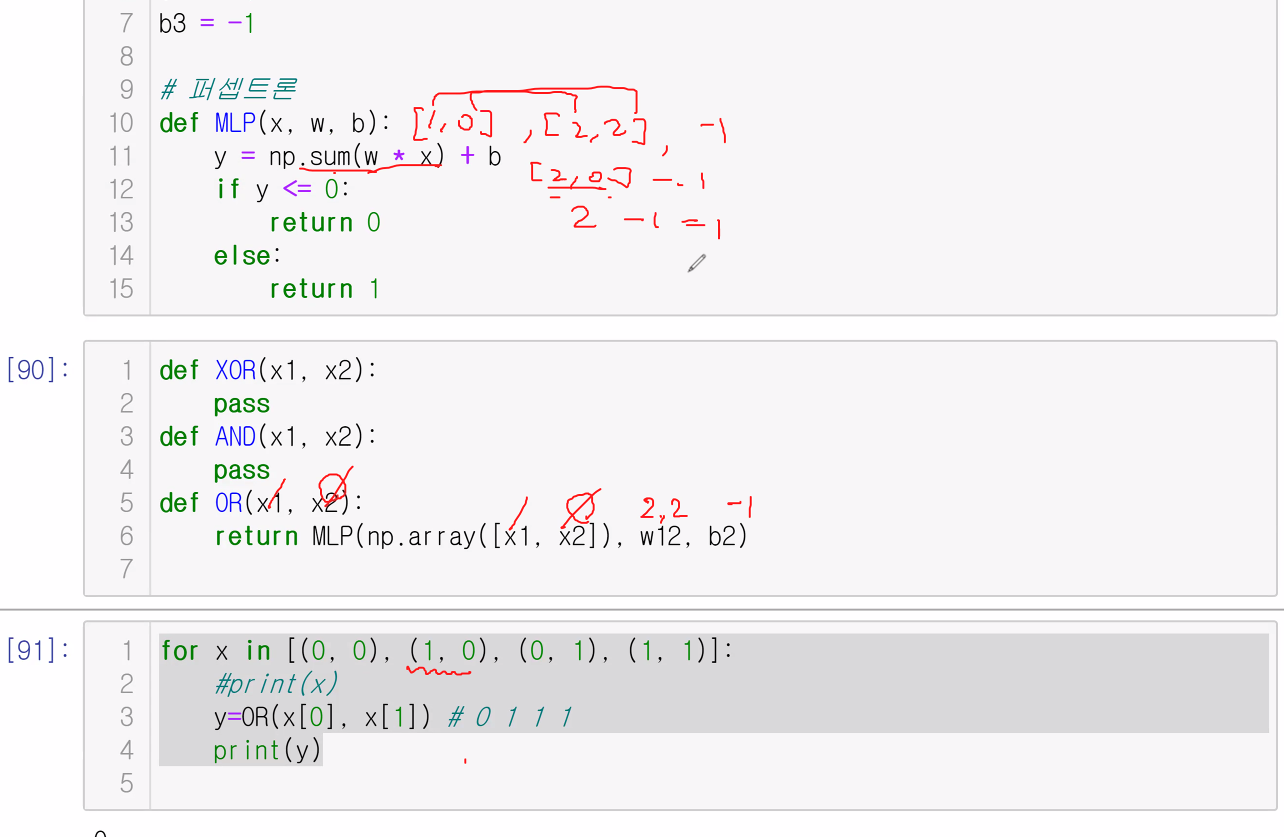
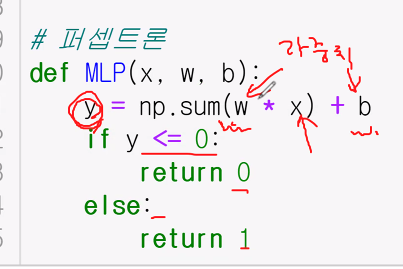
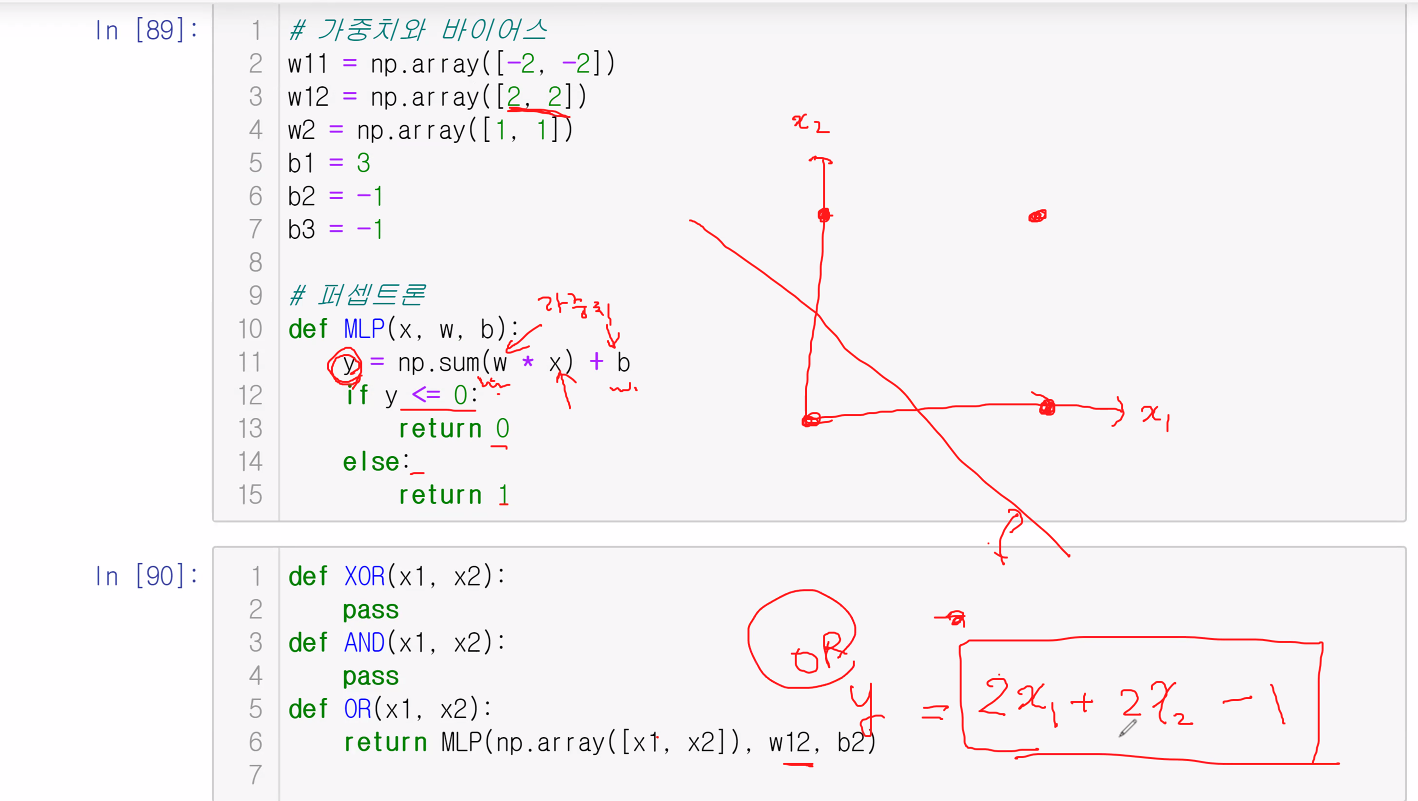

In [3]:
# 다층 퍼셉트론

In [4]:
# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b): 
    y = np.sum(w * x) + b # 3
    if y <= 0:
        return 0
    else:
        return 1

In [5]:
def NAND(x1,x2): 
    return MLP(np.array([x1, x2]), w11, b1)
def XOR(x1,x2): 
    return MLP(np.array([x1, x2]), w12, b2)
def AND(x1,x2): 
    return MLP(np.array([x1, x2]), w2, b3)
def OR(x1,x2):  
    return MLP(np.array([x1, x2]), w12, b2)
def XOR(x1,x2):
    return AND(NAND(x1, x2),OR(x1,x2))# 기존 XOR은 결측값으로 인해 새로 코드를 만들어서 추가
           #3        #1          #2

In [6]:
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    #print(x)
    #y=OR(x[0],x[1])# 4번 반복됨 0 1 1 1출력을 원함
    #y=AND(x[0],x[1])
    y=XOR(x[0],x[1])
    print(y)

0
1
1
0


In [7]:
import seaborn as sns

In [8]:
df = pd.read_csv('data3/pima-indians-diabetes3.csv')

In [9]:
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [11]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


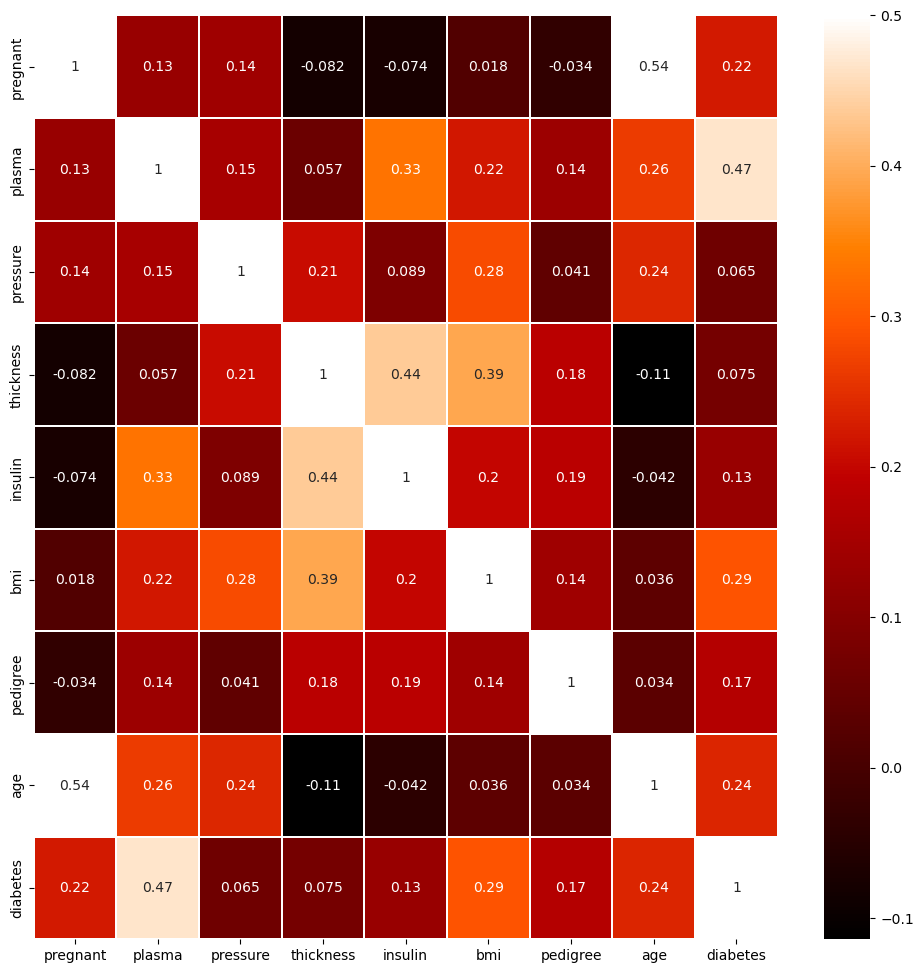

In [13]:
colormap = plt.cm.gist_heat   
plt.figure(figsize=(12,12))  
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [14]:
df.plasma

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: plasma, Length: 768, dtype: int64

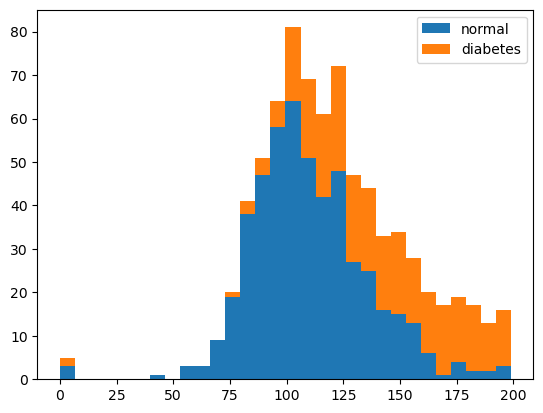

In [15]:
plt.hist(x=[df.plasma[df.diabetes==0], 
            df.plasma[df.diabetes==1]], 
         bins=30, histtype='barstacked', 
         label=['normal','diabetes'])
plt.legend()

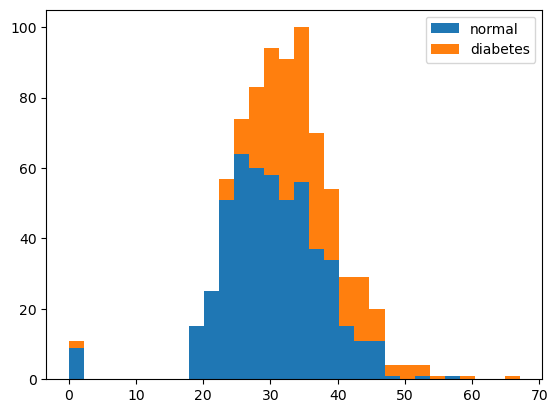

In [16]:
plt.hist(x=[df.bmi[df.diabetes==0],
            df.bmi[df.diabetes==1]],
         bins=30, histtype='barstacked',
         label=['normal','diabetes'])
plt.legend()

In [17]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [18]:
 X

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [19]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [20]:
model = Sequential()

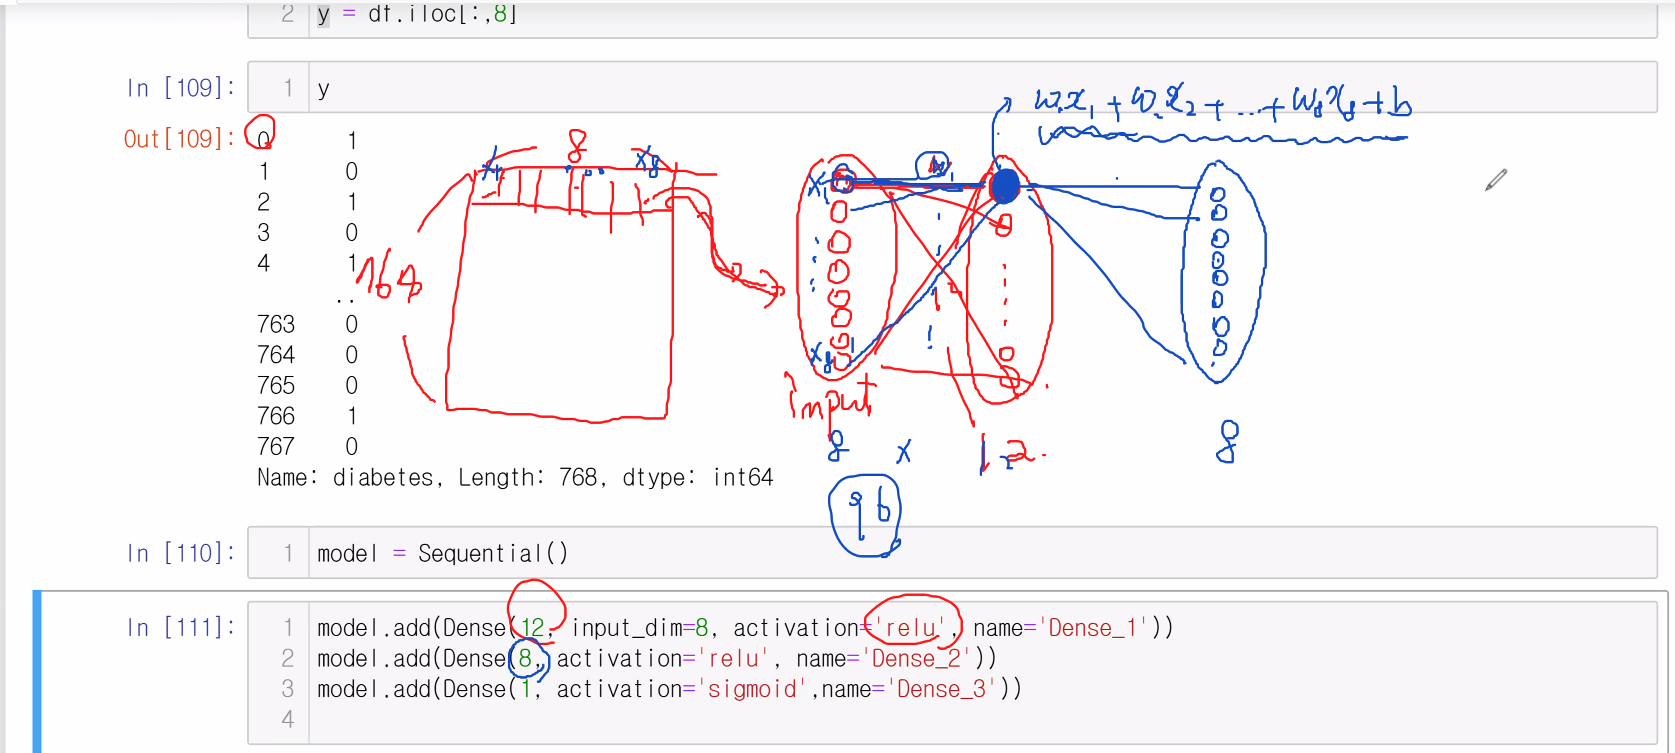

In [21]:
model.add(Dense(32, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(16, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid',name='Dense_3'))

In [22]:
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 32)                288       
                                                                 
 Dense_2 (Dense)             (None, 16)                528       
                                                                 
 Dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
77/77 [==============================] - 1s 2ms/step - loss: 2.8912 - accuracy: 0.5547
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 1.1190 - accuracy: 0.6341
Epoch 3/200
77/77 [==============================] - 0s 3ms/step - loss: 0.9632 - accuracy: 0.6354
Epoch 4/200
77/77 [==============================] - 0s 3ms/step - loss: 0.8270 - accuracy: 0.6628
Epoch 5/200
77/77 [==============================] - 0s 3ms/step - loss: 0.7387 - accuracy: 0.6836
Epoch 6/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6901
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8137 - accuracy: 0.6732
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.6966
Epoch 9/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6758
Epoch 10/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6966
Epoch 11/

77/77 [==============================] - 0s 1ms/step - loss: 0.5531 - accuracy: 0.7253
Epoch 83/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5080 - accuracy: 0.7682
Epoch 84/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5534 - accuracy: 0.7214
Epoch 85/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.7435
Epoch 86/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.7565
Epoch 87/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.7500
Epoch 88/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5087 - accuracy: 0.7656
Epoch 89/200
77/77 [==============================] - 0s 847us/step - loss: 0.5108 - accuracy: 0.7552
Epoch 90/200
77/77 [==============================] - 0s 884us/step - loss: 0.4910 - accuracy: 0.7539
Epoch 91/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.7539
Epoch 92/

77/77 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.7734
Epoch 164/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.7786
Epoch 165/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.7852
Epoch 166/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5023 - accuracy: 0.7826
Epoch 167/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4994 - accuracy: 0.7812
Epoch 168/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7891
Epoch 169/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7891
Epoch 170/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4559 - accuracy: 0.7799
Epoch 171/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7904
Epoch 172/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.7917
Epoc

# 광물 데이터

In [24]:
df = pd.read_csv('data3/sonar3.csv', header=None)

df.head()
# 암석0/ 광석1
# 60개의 음파관련 속성, 광석 여부

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [25]:
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [26]:
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [27]:
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5096
Epoch 2/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5240
Epoch 3/200
21/21 [==============================] - 0s 958us/step - loss: 0.6650 - accuracy: 0.6058
Epoch 4/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.6058
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6058
Epoch 6/200
21/21 [==============================] - 0s 866us/step - loss: 0.6329 - accuracy: 0.6298
Epoch 7/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6182 - accuracy: 0.6971
Epoch 8/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.6731
Epoch 9/200
21/21 [==============================] - 0s 1ms/step - loss: 0.5815 - accuracy: 0.7356
Epoch 10/200
21/21 [==============================] - 0s 1ms/step - loss: 0.5526 - accuracy: 0.7452
Epoch

21/21 [==============================] - 0s 1ms/step - loss: 0.1540 - accuracy: 0.9423
Epoch 83/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.9519
Epoch 84/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1451 - accuracy: 0.9615
Epoch 85/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.9567
Epoch 86/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1423 - accuracy: 0.9567
Epoch 87/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1404 - accuracy: 0.9567
Epoch 88/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1434 - accuracy: 0.9567
Epoch 89/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1331 - accuracy: 0.9519
Epoch 90/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.9519
Epoch 91/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1253 - accuracy: 0.9567
Epoch 92/200


21/21 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 164/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 1.0000
Epoch 165/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 1.0000
Epoch 166/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 167/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 168/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 169/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 170/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0200 - accuracy: 1.0000
Epoch 171/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 1.0000
Epoch 172/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0164 - accuracy: 1.0000
Epoc

In [28]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd

In [29]:
""""
전체 데이터가 1:70%, -.30% 비율 =>  train(7:3), test(7:3) 비율로 나누어짐
"""

'"\n전체 데이터가 1:70%, -.30% 비율 =>  train(7:3), test(7:3) 비율로 나누어짐\n'

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [31]:
X_train.shape

(145, 60)

In [32]:
y_train.shape

(145,)

In [33]:
y_train.value_counts()

1    73
0    72
Name: 60, dtype: int64

In [34]:
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.4621
Epoch 2/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.6000
Epoch 3/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.6759
Epoch 4/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.7241
Epoch 5/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.7034
Epoch 6/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.7586
Epoch 7/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.7586
Epoch 8/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6403 - accuracy: 0.7172
Epoch 9/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.7103
Epoch 10/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6211 - accuracy: 0.6552
Epoch 11/

Epoch 83/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1526 - accuracy: 0.9586
Epoch 84/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1437 - accuracy: 0.9655
Epoch 85/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9655
Epoch 86/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1370 - accuracy: 0.9655
Epoch 87/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1355 - accuracy: 0.9517
Epoch 88/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9655
Epoch 89/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.9586
Epoch 90/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1371 - accuracy: 0.9724
Epoch 91/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1496 - accuracy: 0.9379
Epoch 92/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.9655


15/15 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 1.0000
Epoch 165/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 1.0000
Epoch 166/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0308 - accuracy: 1.0000
Epoch 167/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 168/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 1.0000
Epoch 169/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 1.0000
Epoch 170/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 1.0000
Epoch 171/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 1.0000
Epoch 172/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 1.0000
Epoch 173/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0283 - accuracy: 1.0000
Epoc

In [36]:
score=model.evaluate(X_test, y_test)
score

2/2 [==============================] - 0s 15ms/step - loss: 0.7479 - accuracy: 0.8254


[0.7478501796722412, 0.8253968358039856]

In [37]:
model.save("myModel.hdf5") #pretrained model : 사전학습모델

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
del model

In [39]:
myModel=load_model("myModel.hdf5")

In [40]:
myModel.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.7479 - accuracy: 0.8254


[0.7478501796722412, 0.8253968358039856]

In [41]:
"""
myModel : 광산/암산 구분 모델(사전 학습된 모델)
myModel - 불러오기 -  해저 천연자원 데이터 추가학습 - 모델 : 전이학습(파인튜닝)
![image.png](attachment:image.png)
"""

'\nmyModel : 광산/암산 구분 모델(사전 학습된 모델)\nmyModel - 불러오기 -  해저 천연자원 데이터 추가학습 - 모델 : 전이학습(파인튜닝)\n![image.png](attachment:image.png)\n'

# 와인데이터

In [42]:
df = pd.read_csv('data3/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [43]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [44]:
y.value_counts()

0    4898
1    1599
Name: 12, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [46]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                390       
                                                                 
 dense_7 (Dense)             (None, 12)                372       
                                                                 
 dense_8 (Dense)             (None, 8)                 104       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
"""


10000건
train(8000)                                                    test(2000): test는 절대 손 대면 안된다

여기서 8000건을 아래와 같이
train(0.75, 6000), validation(0.25, 2000)
"""

'\n\n\n10000건\ntrain(8000)                                                    test(2000): test는 절대 손 대면 안된다\n\n여기서 8000건을 아래와 같이\ntrain(0.75, 6000), validation(0.25, 2000)\n'

In [48]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Epoch 1/50
8/8 [==============================] - 1s 19ms/step - loss: 0.9767 - accuracy: 0.5122 - val_loss: 0.6014 - val_accuracy: 0.7538
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6465 - accuracy: 0.7513 - val_loss: 0.6478 - val_accuracy: 0.7538
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5844 - accuracy: 0.7513 - val_loss: 0.4881 - val_accuracy: 0.7546
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4324 - accuracy: 0.7524 - val_loss: 0.3863 - val_accuracy: 0.7685
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3833 - accuracy: 0.7868 - val_loss: 0.3422 - val_accuracy: 0.8308
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3257 - accuracy: 0.8450 - val_loss: 0.3042 - val_accuracy: 0.8646
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.2869 - accuracy: 0.8804 - val_loss: 0.2716 - val_accuracy: 0.9023
Epoch 8/50
8/8 [=================

In [50]:
# 실전, 모델 정확도  0.9361538290977478
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 724us/step - loss: 0.1139 - accuracy: 0.9623


[0.11389007419347763, 0.9623076915740967]

In [51]:
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [52]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [53]:
#모델의 최적 상태 저장

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                390       
                                                                 
 dense_11 (Dense)            (None, 12)                372       
                                                                 
 dense_12 (Dense)            (None, 8)                 104       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"


In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [60]:
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [61]:
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all\01-0.8769.hdf5

Epoch 2: saving model to ./data/model/all\02-0.9123.hdf5

Epoch 3: saving model to ./data/model/all\03-0.8354.hdf5

Epoch 4: saving model to ./data/model/all\04-0.9100.hdf5

Epoch 5: saving model to ./data/model/all\05-0.9131.hdf5


C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 6: saving model to ./data/model/all\06-0.9192.hdf5

Epoch 7: saving model to ./data/model/all\07-0.9269.hdf5

Epoch 8: saving model to ./data/model/all\08-0.9246.hdf5

Epoch 9: saving model to ./data/model/all\09-0.9246.hdf5

Epoch 10: saving model to ./data/model/all\10-0.9246.hdf5

Epoch 11: saving model to ./data/model/all\11-0.9285.hdf5

Epoch 12: saving model to ./data/model/all\12-0.9308.hdf5

Epoch 13: saving model to ./data/model/all\13-0.9300.hdf5

Epoch 14: saving model to ./data/model/all\14-0.9315.hdf5

Epoch 15: saving model to ./data/model/all\15-0.9323.hdf5

Epoch 16: saving model to ./data/model/all\16-0.9323.hdf5

Epoch 17: saving model to ./data/model/all\17-0.9338.hdf5

Epoch 18: saving model to ./data/model/all\18-0.9331.hdf5

Epoch 19: saving model to ./data/model/all\19-0.9331.hdf5

Epoch 20: saving model to ./data/model/all\20-0.9331.hdf5

Epoch 21: saving model to ./data/model/all\21-0.9331.hdf5

Epoch 22: saving model to ./data/model/all\22-0.9338.hdf5



In [62]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1344 - accuracy: 0.9577
Test accuracy: 0.9576923251152039


In [63]:
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [64]:
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.131723,0.953041,0.152996,0.943077
1,0.128416,0.951758,0.145420,0.943846
2,0.126726,0.951758,0.145529,0.942308
3,0.125321,0.952271,0.143194,0.943846
4,0.127170,0.953041,0.144649,0.945385
...,...,...,...,...
1995,0.016781,0.995638,0.087584,0.987692
1996,0.016294,0.995894,0.088786,0.986154
1997,0.018184,0.994868,0.090194,0.986154
1998,0.019030,0.994611,0.093617,0.985385


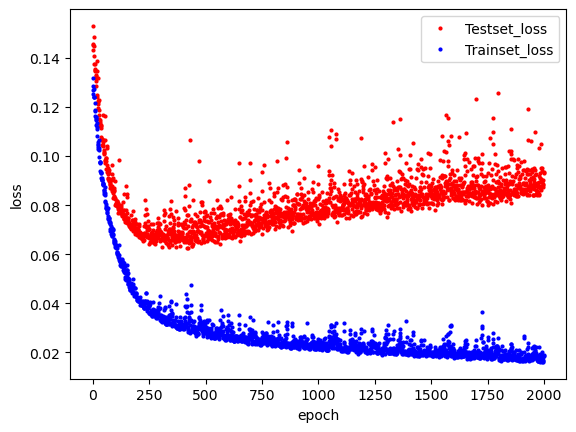

In [65]:
y_vloss=hist_df['val_loss']
y_loss=hist_df['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [66]:
###### 학습 자동 중단

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('data3/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 30)                390       
                                                                 
 dense_15 (Dense)            (None, 12)                372       
                                                                 
 dense_16 (Dense)            (None, 8)                 104       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 [==============================] - 1s 21ms/step - loss: 1.5488 - accuracy: 0.7480 - val_loss: 0.9246 - val_accuracy: 0.7454
Epoch 2/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.6498 - accuracy: 0.7162 - val_loss: 0.5589 - val_accuracy: 0.6623
Epoch 3/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.4429 - accuracy: 0.7344 - val_loss: 0.3634 - val_accuracy: 0.8223
Epoch 4/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.4683 - accuracy: 0.7940

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 12ms/step - loss: 0.3361 - accuracy: 0.8494 - val_loss: 0.3107 - val_accuracy: 0.9000
Epoch 5/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.2891 - accuracy: 0.9097 - val_loss: 0.2744 - val_accuracy: 0.9285
Epoch 6/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.2559 - accuracy: 0.9310 - val_loss: 0.2506 - val_accuracy: 0.9346
Epoch 7/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.2339 - accuracy: 0.9281 - val_loss: 0.2357 - val_accuracy: 0.9354
Epoch 8/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.2209 - accuracy: 0.9356 - val_loss: 0.2253 - val_accuracy: 0.9377
Epoch 9/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.2129 - accuracy: 0.9328 - val_loss: 0.2154 - val_accuracy: 0.9385
Epoch 10/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.2028 - accuracy: 0.9384 - val_loss: 0.2066 - val_accuracy: 0.9385
Epoch 11/2000
8/8 [============

8/8 [==============================] - 0s 5ms/step - loss: 0.1057 - accuracy: 0.9630 - val_loss: 0.1147 - val_accuracy: 0.9600
Epoch 63/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1048 - accuracy: 0.9654 - val_loss: 0.1112 - val_accuracy: 0.9662
Epoch 64/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1041 - accuracy: 0.9630 - val_loss: 0.1111 - val_accuracy: 0.9654
Epoch 65/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1018 - accuracy: 0.9651 - val_loss: 0.1088 - val_accuracy: 0.9731
Epoch 66/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1001 - accuracy: 0.9654 - val_loss: 0.1078 - val_accuracy: 0.9738
Epoch 67/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1010 - accuracy: 0.9646 - val_loss: 0.1085 - val_accuracy: 0.9762
Epoch 68/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1011 - accuracy: 0.9654 - val_loss: 0.1116 - val_accuracy: 0.9746
Epoch 69/2000
8/8 [========

8/8 [==============================] - 0s 4ms/step - loss: 0.0684 - accuracy: 0.9797 - val_loss: 0.0820 - val_accuracy: 0.9792
Epoch 121/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0677 - accuracy: 0.9795 - val_loss: 0.0813 - val_accuracy: 0.9785
Epoch 122/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0672 - accuracy: 0.9810 - val_loss: 0.0810 - val_accuracy: 0.9785
Epoch 123/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0716 - accuracy: 0.9790 - val_loss: 0.0815 - val_accuracy: 0.9785
Epoch 124/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0710 - accuracy: 0.9782 - val_loss: 0.0928 - val_accuracy: 0.9723
Epoch 125/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0694 - accuracy: 0.9800 - val_loss: 0.0803 - val_accuracy: 0.9785
Epoch 126/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0666 - accuracy: 0.9802 - val_loss: 0.0800 - val_accuracy: 0.9785
Epoch 127/2000
8/8

Epoch 178/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0508 - accuracy: 0.9849 - val_loss: 0.0692 - val_accuracy: 0.9800
Epoch 179/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0516 - accuracy: 0.9846 - val_loss: 0.0676 - val_accuracy: 0.9815
Epoch 180/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0507 - accuracy: 0.9849 - val_loss: 0.0696 - val_accuracy: 0.9808
Epoch 181/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0515 - accuracy: 0.9851 - val_loss: 0.0673 - val_accuracy: 0.9800
Epoch 182/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0501 - accuracy: 0.9867 - val_loss: 0.0675 - val_accuracy: 0.9808
Epoch 183/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9864 - val_loss: 0.0696 - val_accuracy: 0.9823
Epoch 184/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9872 - val_loss: 0.0696 - val_accuracy: 0.9808
Epoch 

Epoch 236/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9890 - val_loss: 0.0611 - val_accuracy: 0.9815
Epoch 237/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0422 - accuracy: 0.9892 - val_loss: 0.0607 - val_accuracy: 0.9815
Epoch 238/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0427 - accuracy: 0.9874 - val_loss: 0.0605 - val_accuracy: 0.9823
Epoch 239/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0423 - accuracy: 0.9890 - val_loss: 0.0602 - val_accuracy: 0.9823
Epoch 240/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0441 - accuracy: 0.9882 - val_loss: 0.0600 - val_accuracy: 0.9823
Epoch 241/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9872 - val_loss: 0.0722 - val_accuracy: 0.9762
Epoch 242/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0663 - val_accuracy: 0.9785
Epoch 

In [70]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9815


[0.08022638410329819, 0.9815384745597839]

In [74]:
pd.read_csv("wdbc(1).data", header=None)
#B(양):0, M(악) : 1

# 트레인 : 0번~450번까지 데이터
# 테스트 : 451번~568번까지 데이터

#딥러닝 모델 생성 -> 정확도 향상

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
